# Spatially resolved Mass-Metallicity relation for EDGE, at 7" resolution.

In [1]:
import numpy as np
from astropy.table import Table, join, Column
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from edge_pydb import EdgeTable
from edge_pydb.plotting import xy2hist
from edge_pydb.conversion import ZOH_M13, kewley01, kauffm03, cidfer10
np.seterr(invalid='ignore')
plt.rcParams["scatter.edgecolors"] = 'none'

## Load data from the HDF5 files

In [2]:
fluxcols = ['Name','ix','iy',
            'flux_Halpha_sm','e_flux_Halpha_sm','flux_Hbeta_sm','e_flux_Hbeta_sm',
            'flux_[NII]6583_sm','e_flux_[NII]6583_sm','flux_[OIII]5007_sm','e_flux_[OIII]5007_sm',
            'EW_Halpha_sm','ZOH_sm','ZOH_N2_sm','ZOH_PP04_sm','BPT_sm','SF_BPT_sm',
            'alphsca_SL24_sm','alphsca_B13_sm']
sspcols = ['Name','ix','iy','sigstar_sm']
comom_cols = ['Name','ix','iy','sigmol','e_sigmol']

try:
    fluxtab = EdgeTable('edge_carma.2d_smo7.hdf5', path='flux_elines_sm', cols=fluxcols)
    ssptab  = EdgeTable('edge_carma.2d_smo7.hdf5', path='SSP_sm', cols=sspcols)
    cotab   = EdgeTable('edge_carma.2d_smo7.hdf5', path='comom_smo', cols=comom_cols)
    print('Working on full EDGE database')
except:
    fluxtab = EdgeTable('NGC4047.2d_smo7.hdf5', path='flux_elines_sm', cols=fluxcols)
    ssptab  = EdgeTable('NGC4047.2d_smo7.hdf5', path='SSP_sm', cols=sspcols)
    cotab   = EdgeTable('NGC4047.2d_smo7.hdf5', path='comom_smo', cols=comom_cols)
    print('Working on NGC 4047 data')

Working on full EDGE database


## Build the table

In [3]:
fluxtab.join(ssptab, keys=['Name', 'ix', 'iy'])
fluxtab.join(cotab,  keys=['Name', 'ix', 'iy'])
goodval = ((fluxtab['sigstar_sm']>0) & (fluxtab['ZOH_sm']>0) & (fluxtab['ZOH_PP04_sm']>0))
fluxtab = fluxtab[goodval]
print(fluxtab.colnames)

['Name', 'ix', 'iy', 'flux_Halpha_sm', 'e_flux_Halpha_sm', 'flux_Hbeta_sm', 'e_flux_Hbeta_sm', 'flux_[NII]6583_sm', 'e_flux_[NII]6583_sm', 'flux_[OIII]5007_sm', 'e_flux_[OIII]5007_sm', 'EW_Halpha_sm', 'ZOH_sm', 'ZOH_N2_sm', 'ZOH_PP04_sm', 'BPT_sm', 'SF_BPT_sm', 'alphsca_SL24_sm', 'alphsca_B13_sm', 'sigstar_sm', 'sigmol', 'e_sigmol']


In [4]:
fluxtab

Name,ix,iy,flux_Halpha_sm,e_flux_Halpha_sm,flux_Hbeta_sm,e_flux_Hbeta_sm,flux_[NII]6583_sm,e_flux_[NII]6583_sm,flux_[OIII]5007_sm,e_flux_[OIII]5007_sm,EW_Halpha_sm,ZOH_sm,ZOH_N2_sm,ZOH_PP04_sm,BPT_sm,SF_BPT_sm,alphsca_SL24_sm,alphsca_B13_sm,sigstar_sm,sigmol,e_sigmol
,,,1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),1e-16 erg / (s cm2),Angstrom,dex,dex,dex,,,dex,,solMass / pc2,solMass / pc2,solMass / pc2
bytes13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32
IC0480,52,55,0.27460945,0.03155342,0.10710252,0.06783856,0.100532055,0.035478793,0.04474811,0.07386001,-16.285711,8.52072,8.541378,8.711637,-1.0,True,1.7944034,nan,21.070925,-7.706034,6.070382
IC0480,52,58,0.26242784,0.023894908,0.12821199,0.060475186,0.05013924,0.02338542,0.13655788,0.050833803,-17.491673,8.373309,8.410899,8.49121,-1.0,True,2.985628,1.5456891,24.849604,-8.546124,6.0063396
IC0480,52,82,0.083204426,0.020921156,0.06876559,0.09472521,0.041214716,0.025342664,0.007959594,0.047853068,-7.611095,8.668117,8.602047,8.932044,-1.0,True,1.0785108,nan,6.6101894,nan,nan
IC0480,55,37,0.31407455,0.026514634,0.22967201,0.06480988,0.12817492,0.030566597,0.005677237,0.049339782,-7.8462825,8.793596,8.563176,9.119678,-1.0,True,0.6992057,nan,37.286427,nan,nan
IC0480,55,40,0.40044454,0.024545258,0.17729183,0.037808247,0.06495649,0.024687426,0.032524347,0.048032448,-9.329156,8.521564,8.3780575,8.712899,-1.0,True,1.78918,1.2160554,44.25594,3.236177,2.1365373
IC0480,55,43,0.92425925,0.024912318,0.21706659,0.036283992,0.20865238,0.022396395,0.15971932,0.040019408,-18.86559,8.423189,8.444377,8.565797,-1.0,True,2.513134,1.4126685,47.390396,16.639338,5.0563245
IC0480,55,49,0.43119517,0.023958912,0.133968,0.04746604,0.12918377,0.027695905,0.074151225,0.04684524,-9.366219,8.475951,8.501159,8.644693,-1.0,True,2.0944626,1.2980918,59.014553,23.098715,5.5347605
IC0480,55,55,0.4931717,0.023425136,0.16852199,0.05593353,0.16811457,0.02336881,0.077576816,0.048966836,-13.01076,8.50508,8.527064,8.688251,-1.0,True,1.893996,1.2410855,75.08748,20.914492,6.2711387


## Plot the mass-metallicity relation (two different metallicity prescriptions)

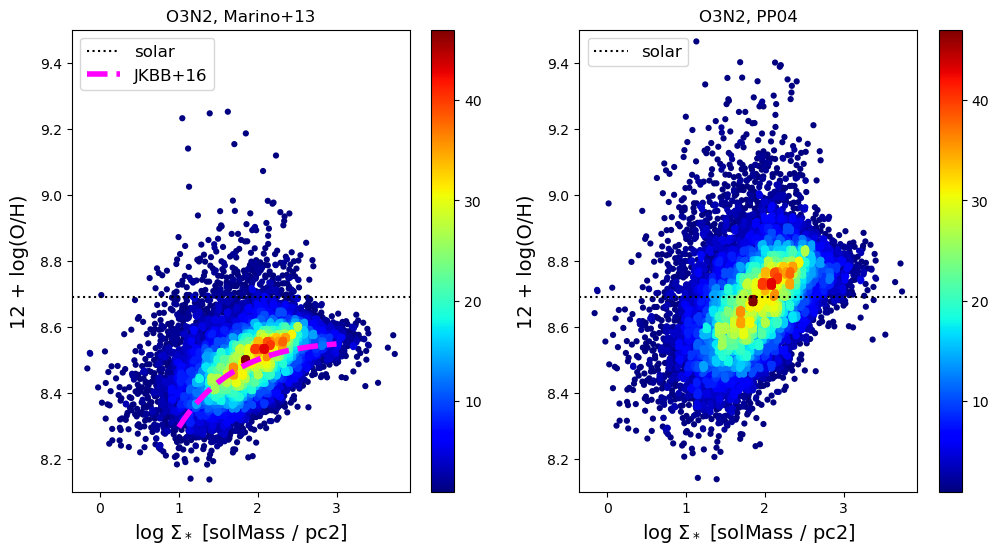

In [5]:
x_det, y_det, z_det, *hist = xy2hist(np.log10(fluxtab['sigstar_sm']), 
                                     fluxtab['ZOH_sm'], log=False)
x_pp, y_pp, z_pp, *hist_pp = xy2hist(np.log10(fluxtab['sigstar_sm']), 
                                     fluxtab['ZOH_PP04_sm'], log=False)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))
sc1 = ax1.scatter(x_det, y_det, c=z_det, s=20, cmap='jet')
cb1 = plt.colorbar(sc1)
sc2 = ax2.scatter(x_pp, y_pp, c=z_pp, s=20, cmap='jet')
cb2 = plt.colorbar(sc2)
ax1.set_title('O3N2, Marino+13')
ax2.set_title('O3N2, PP04')

for ax in [ax1, ax2]:
    ax.axhline(8.69, ls=':', color='k', label='solar')
    if ax == ax1:
        # From MaNGA paper, doi:10.1093/mnras/stw1984
        xmod = np.linspace(1,3,num=50)
        ymod = 8.55 + 0.014*(xmod-3.14)*np.exp(-(xmod-3.14))
        ax.plot(xmod,ymod,color='magenta',ls='--',lw=4,label='JKBB+16')
    ax.legend(loc='upper left',fontsize=12)
    ax.set_xlabel('log $\Sigma_*$ ['+str(fluxtab['sigstar_sm'].unit)+']',fontsize=14)
    ax.set_ylabel('12 + log(O/H)',fontsize=14,labelpad=8)
    ax.set_ylim([8.1, 9.5])

## Metallicity vs. stellar-to-gas mass ratio

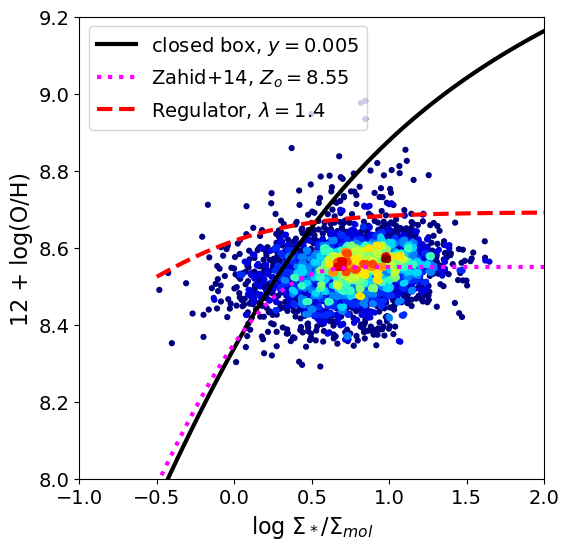

In [6]:
ratio = Column(fluxtab['sigstar_sm']/fluxtab['sigmol'], name='ratio')
codet = (fluxtab['sigmol']>3*fluxtab['e_sigmol'])
x_det, y_det, z_det, *hist = xy2hist(np.log10(ratio[codet]), fluxtab['ZOH_sm'][codet], log=False)

fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(x_det, y_det, c=z_det, s=20, cmap='jet')

# Closed box model with fixed yield
yld = 0.005
xmod = np.linspace(-0.5,2,100)  # log(\Sigma_*/\Sigma_gas)
ymod = 10.80 + np.log10(yld*np.log(1+10**xmod))
plt.plot(xmod, ymod, linestyle='-', lw=3, color='k', label='closed box, $y=$'+str(yld))

# Universal relation of Zahid+14 (2014ApJ...791..130Z), Eqn (5) + (20)
Zo = 8.55
ymod2 = Zo + np.log10(1-np.exp(-10**xmod))
plt.plot(xmod, ymod2, linestyle=':', lw=3, color='magenta', label='Zahid+14, $Z_o=$'+str(Zo))

# Gas regulator model with constant mass loading factor lambda = 1.4
R   = 0.4
eps = -0.25
lam = 1.4
yld = 0.014
Z0  = 3e-3
Z = Z0 + yld/(1+10**(-xmod)+(lam+eps)/(1-R))  # Eq. 11 of 2018ApJ...852...74B
ymod3 = 10.80 + np.log10(Z)
plt.plot(xmod, ymod3, linestyle='--', lw=3, color='r', label='Regulator, $\lambda=$'+str(lam))

plt.legend(loc='upper left',fontsize=14)
plt.xlabel('log $\Sigma_*/\Sigma_{mol}$',fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
plt.xlim(-1,2)
plt.ylim(8,9.2)
ax.tick_params(axis='both', which='major', labelsize=14)

## Metallicity using N2 estimator from Marino+13

Number of points: 14413


(8.1, 8.8)

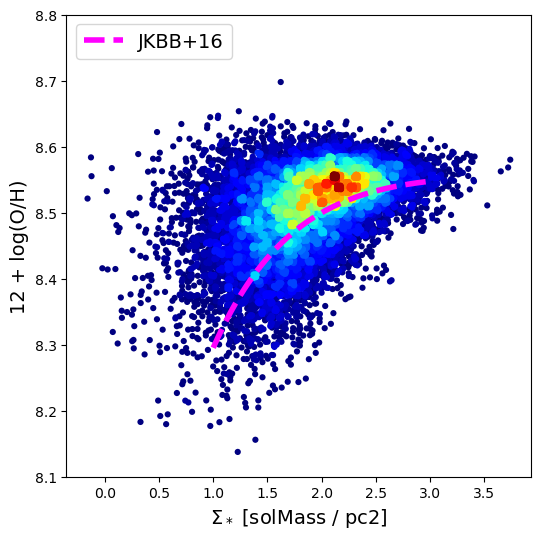

In [7]:
not_nan = (fluxtab['ZOH_N2_sm']>0)
print('Number of points:',len(fluxtab['ZOH_N2_sm'][not_nan]))
x_det, y_det, z_det, *hist = xy2hist(np.log10(fluxtab['sigstar_sm'][not_nan]), 
                                     fluxtab['ZOH_N2_sm'][not_nan], log=False)

fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(x_det, y_det, c=z_det, s=20, cmap='jet')
# From MaNGA paper, doi:10.1093/mnras/stw1984
xmod = np.linspace(1,3,num=50)
ymod = 8.55 + 0.014*(xmod-3.14)*np.exp(-(xmod-3.14))
plt.plot(xmod,ymod,color='magenta',ls='--',lw=4,label='JKBB+16')
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('$\Sigma_*$ ['+str(fluxtab['sigstar_sm'].unit)+']',fontsize=14)
plt.ylabel('12 + log(O/H)',fontsize=14)
plt.ylim(8.1,8.8)

## Adjustments to $\alpha_{\rm CO}$ from Schinnerer & Leroy prescriptions

Text(0.95, 0.9, 'PP04')

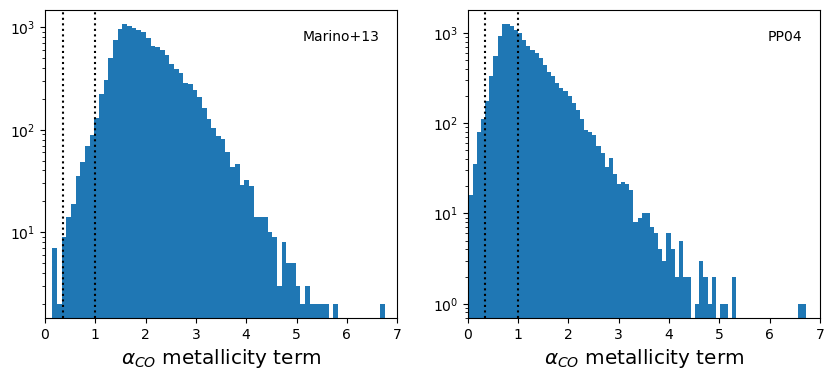

In [8]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,4))
metfactor = []
metfactor.append(10**(-1.5*(fluxtab['ZOH_sm']-8.69)))
metfactor.append(10**(-1.5*(fluxtab['ZOH_PP04_sm']-8.69)))
for i, ax in enumerate([ax1,ax2]):
    ax.hist(metfactor[i], bins='scott', log=True)
    ax.set_xlabel(r'$\alpha_{CO}$ metallicity term', size='x-large')
    ax.set_xlim([0,7])
    ax.axvline(1, ls=':', color='k')
    ax.axvline(0.2**(-1.5), ls=':', color='k')
    ax.axvline(2**(-1.5), ls=':', color='k')
ax1.text(0.95,0.9, 'Marino+13', ha='right', transform=ax1.transAxes)
ax2.text(0.95,0.9, 'PP04', ha='right', transform=ax2.transAxes)

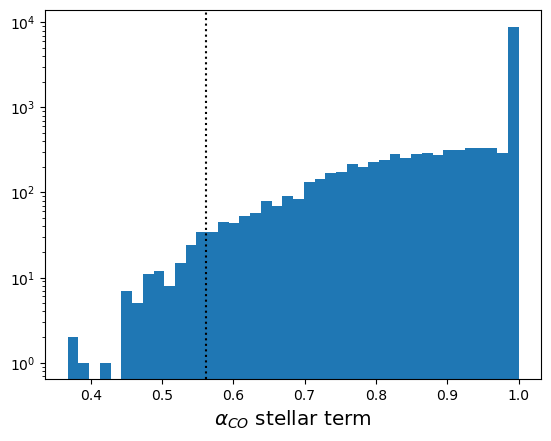

In [9]:
sigstar = fluxtab['sigstar_sm']
sigstar[fluxtab['sigstar_sm']<100] = 100
starfactor = (sigstar/100)**(-0.25)
plt.hist(starfactor, bins='scott', log=True)
plt.xlabel(r'$\alpha_{CO}$ stellar term', size='x-large')
plt.gca().axvline(10**(-0.25), ls=':', color='k')

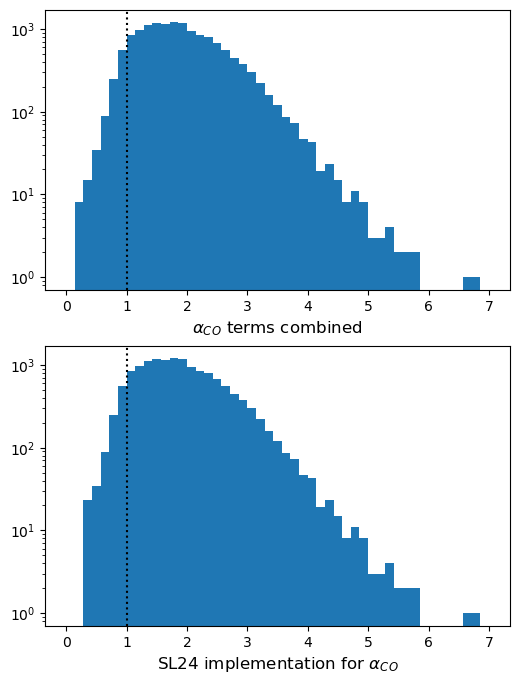

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(6,8))
bins = np.linspace(0,7,num=50)
ax1.hist(metfactor[0]*starfactor, bins=bins, log=True)
ax1.set_xlabel(r'$\alpha_{CO}$ terms combined', size='large')
ax1.axvline(1, ls=':', color='k')
ax2.hist(fluxtab['alphsca_SL24_sm'], bins=bins, log=True)
ax2.set_xlabel(r'SL24 implementation for $\alpha_{CO}$', size='large')
ax2.axvline(1, ls=':', color='k')

## Plot the BPT diagram, coloring the star-forming points by metallicity

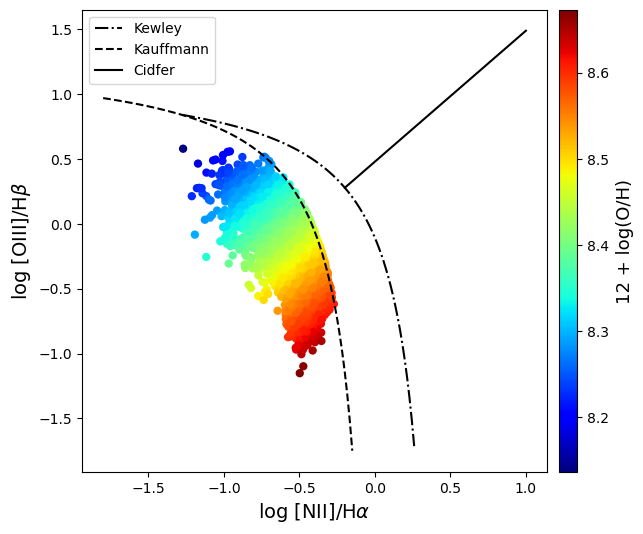

In [11]:
fig = plt.figure(figsize=(6,6))

# Impose S/N cut on emission lines
N2F = fluxtab['flux_[NII]6583_sm']
O3F = fluxtab['flux_[OIII]5007_sm']
HaF = fluxtab['flux_Halpha_sm']
HbF = fluxtab['flux_Hbeta_sm']

snrcut = 3
N2g = (abs(fluxtab['e_flux_[NII]6583_sm']/fluxtab['flux_[NII]6583_sm']) < 1/snrcut)
O3g = (abs(fluxtab['e_flux_[OIII]5007_sm']/fluxtab['flux_[OIII]5007_sm']) < 1/snrcut)
Hag = (abs(fluxtab['e_flux_Halpha_sm']/fluxtab['flux_Halpha_sm']) < 1/snrcut)
Hbg = (abs(fluxtab['e_flux_Hbeta_sm']/fluxtab['flux_Hbeta_sm']) < 1/snrcut)
cond = N2g & O3g & Hag & Hbg

ZOH = fluxtab['ZOH_sm'][cond]
xval = np.log10(N2F[cond]/HaF[cond])
yval = np.log10(O3F[cond]/HbF[cond])

# Make the scatter plot
sc = plt.scatter(xval, yval, c=ZOH, cmap='jet')

# Plot BPT demarcation lines
kewley_start = -1.2805
cidfer_start = -0.1993
kewley_end = 0.26
kauffm_end = -0.15

x1 = np.linspace(kewley_start, kewley_end, 100)
x2 = np.linspace(-1.8, kauffm_end, 100)
x3 = np.linspace(cidfer_start, 1, 100)
plt.plot(x1, kewley01(x1), 'k-.', label="Kewley")
plt.plot(x2, kauffm03(x2), 'k--', label="Kauffmann")
plt.plot(x3, cidfer10(x3), 'k-',  label="Cidfer")
plt.xlabel(r'log [NII]/H$\alpha$',fontsize=14)
plt.ylabel(r'log [OIII]/H$\beta$',fontsize=14)
plt.legend()
ax = plt.gca()
cax = fig.add_axes([ax.get_position().x1+0.02, ax.get_position().y0, 
                    0.03, ax.get_position().height])
cb = fig.colorbar(sc, cax=cax)
cb.set_label('12 + log(O/H)', size=13,labelpad=5)

## Histograms of star-forming points

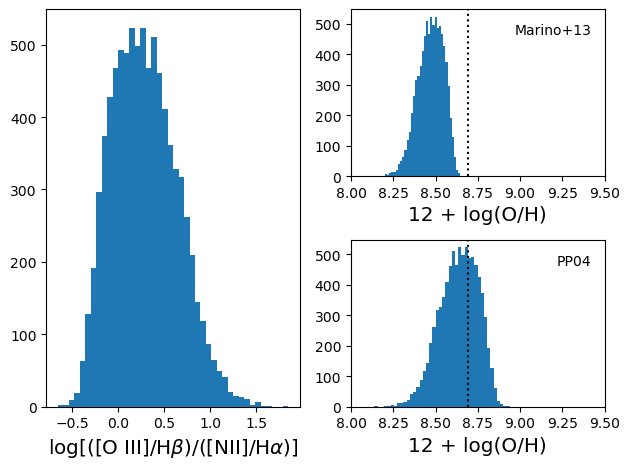

In [12]:
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
ax = fig.add_subplot(gs[:, 0])
O3N2 = (np.log10(O3F[cond]) - np.log10(HbF[cond]) - (np.log10(N2F[cond]) - np.log10(HaF[cond])))                    
ax.hist(O3N2, bins='scott')
ax.set_xlabel(r'log[([O III]/H$\beta$)/([NII]/H$\alpha$)]', size='x-large')
ax1 = fig.add_subplot(gs[0, 1])
ax1.hist(fluxtab['ZOH_sm'][cond], bins='scott')
ax1.set_xlabel('12 + log(O/H)', size='x-large')
ax1.set_xlim([8,9.5])
ax1.text(0.95,0.85, 'Marino+13', ha='right', transform=ax1.transAxes)
ax1.axvline(8.69, ls=':', color='k')
ax2 = fig.add_subplot(gs[1, 1])
ax2.hist(fluxtab['ZOH_PP04_sm'][cond], bins='scott')
ax2.set_xlabel('12 + log(O/H)', size='x-large')
ax2.set_xlim([8,9.5])
ax2.text(0.95,0.85, 'PP04', ha='right', transform=ax2.transAxes)
ax2.axvline(8.69, ls=':', color='k')